# Audio analysis 

In [2]:
import numpy as np
import librosa
import librosa.display
import time
import scipy.signal as signal
import IPython.display as ipd
import argparse
import sys
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [3]:
filename = librosa.util.example_audio_file()
>>> y, sr = librosa.load('mo.mp3')
y, sr = librosa.load('mo.mp3')
audio, sr = librosa.load('mo.mp3', sr=sr)

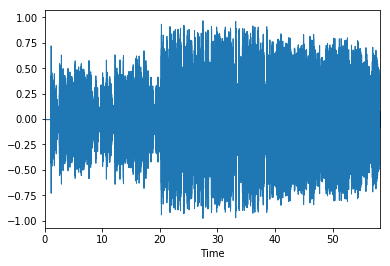

In [97]:
librosa.display.waveplot(y,sr)

# Percussive & harmonic  separation

In [12]:
D = librosa.stft(y)


In [16]:
D_harmonic, D_percussive = librosa.decompose.hpss(D)

/anaconda3/lib/python3.7/site-packages/librosa/core/spectrum.py:960: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


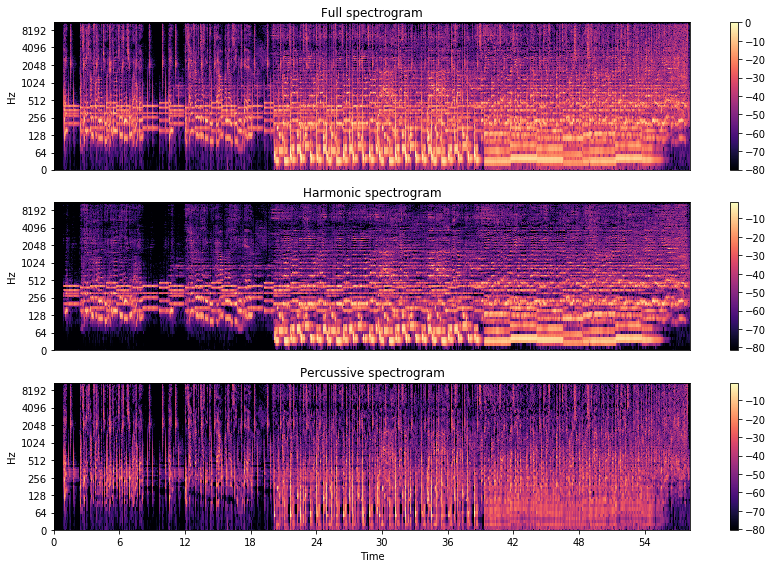

In [17]:
# Pre-compute a global reference power from the input spectrum
rp = np.max(np.abs(D))

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=rp), y_axis='log')
plt.colorbar()
plt.title('Full spectrogram')

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(D_harmonic, ref=rp), y_axis='log')
plt.colorbar()
plt.title('Harmonic spectrogram')

plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(D_percussive, ref=rp), y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Percussive spectrogram')
plt.tight_layout()

# Calculating MFCC from MEL spectrogram

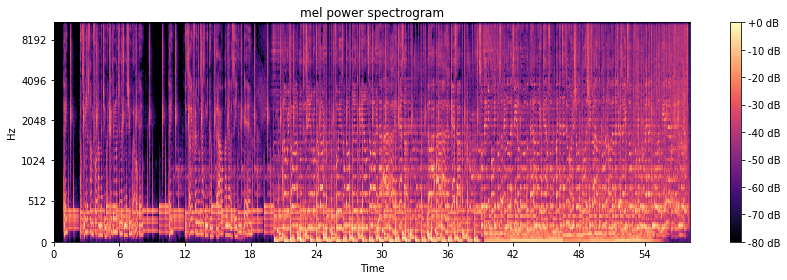

In [18]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

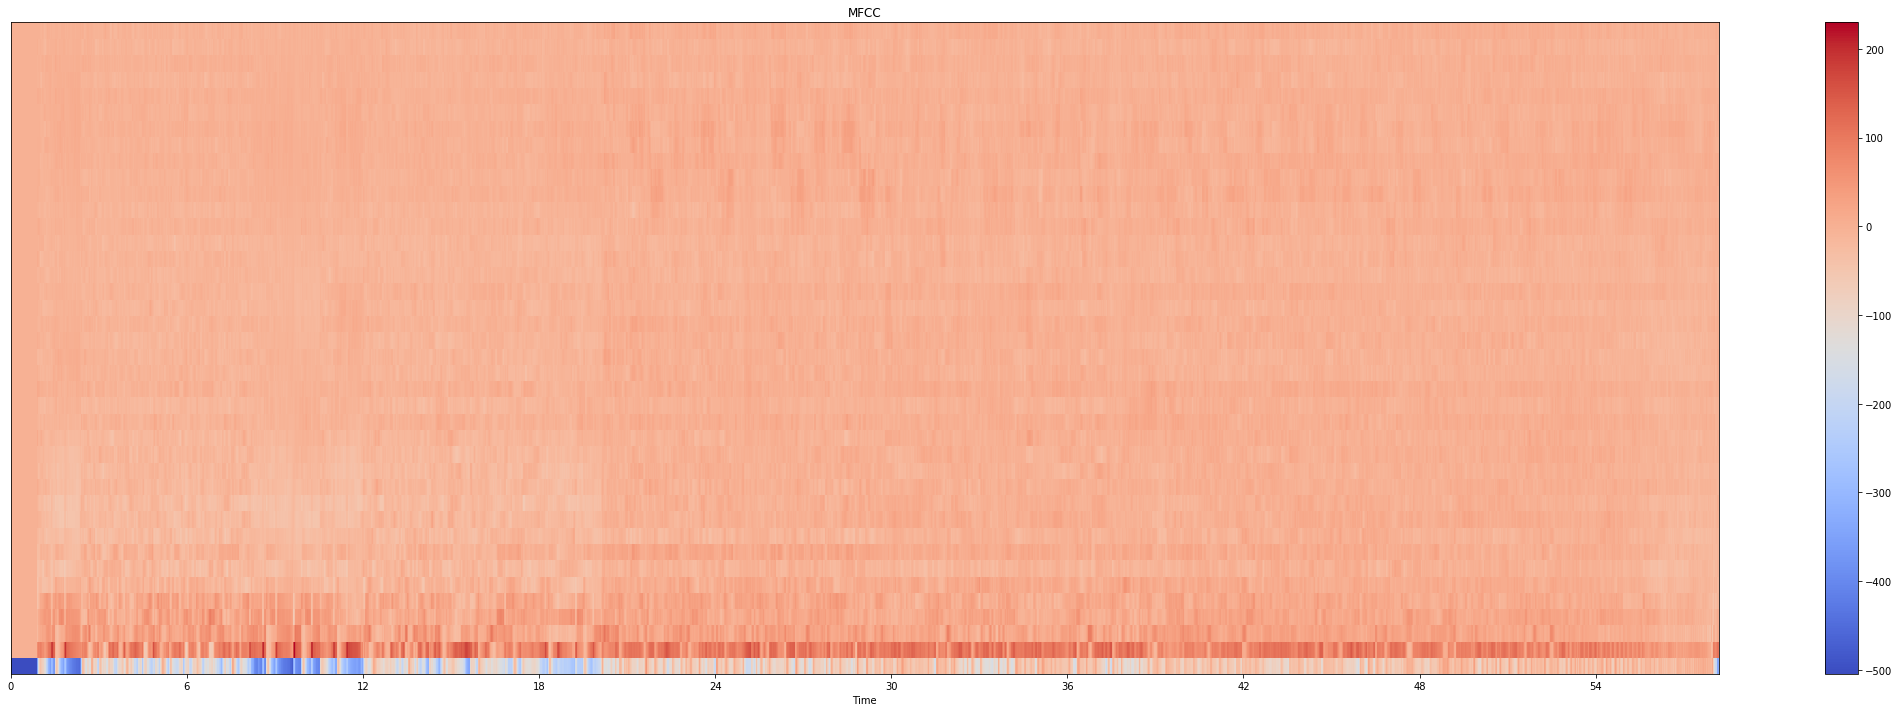

In [51]:
>>> import matplotlib.pyplot as plt
>>> plt.figure(figsize=(30, 10))
>>> librosa.display.specshow(mfccs, x_axis='time')
>>> plt.colorbar()
>>> plt.title('MFCC')
>>> plt.tight_layout()

In [65]:
X, sample_rate = librosa.load('mo.mp3')
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
print (mfccs)


[-1.03067978e+02  8.07315870e+01  2.50568017e+01  1.97068851e+01
  1.35776915e+01  3.02258537e+00 -9.72196008e+00  5.25054646e+00
 -9.64335531e+00 -4.06738360e+00 -8.48285138e+00 -4.40602682e+00
 -6.53514895e+00 -4.42560483e+00 -3.47629019e+00  2.72368883e+00
 -4.64081032e+00  3.29302895e+00 -3.39182229e+00 -3.64079221e+00
 -3.03746564e+00  2.75595587e-01 -5.39537614e+00  1.63034269e-01
 -6.36454219e+00 -4.92910532e+00 -6.69122244e+00  6.43446260e-02
 -3.46859652e+00  3.73751357e+00  8.84245811e-01  4.38935581e+00
  1.18054046e+00  4.16577122e+00  8.19594682e-01  2.91446711e+00
 -2.79369655e+00  8.79791707e-01 -4.27606099e+00  2.84307161e-01]


In [68]:
mfccs = librosa.feature.mfcc(y, sr=sr)
print (mfccs.shape)

(20, 2506)


Text(0.5,0,'Frame Index')

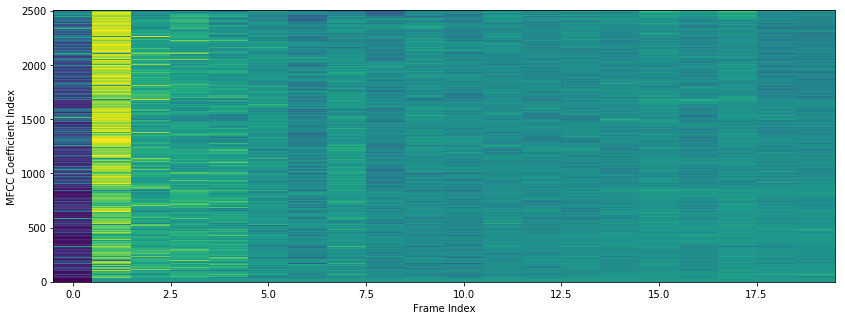

In [73]:
mfccs = sklearn.preprocessing.scale(mfccs)

plt.imshow(mfccs.T, origin='lower', aspect='auto', interpolation='nearest')
plt.ylabel('MFCC Coefficient Index')
plt.xlabel('Frame Index')

# quantify the audio with descriptors

## spectral flatness

In [128]:
S, phase = librosa.magphase(librosa.stft(y))
librosa.feature.spectral_flatness(S=S)

array([[1.0000007 , 1.0000007 , 1.0000007 , ..., 0.04510798, 0.02761923,
        0.02083987]], dtype=float32)

## Spectral Centroid


In [17]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd, sklearn
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (14, 5)

In [14]:
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
spectral_centroids.shape

(2506,)

In [15]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

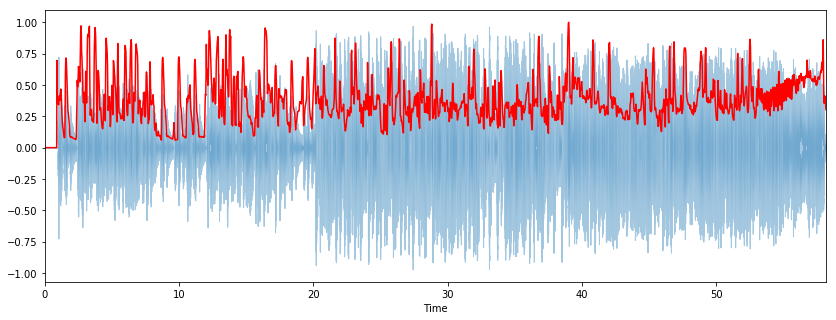

In [19]:
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r') 

## spectral rolloff

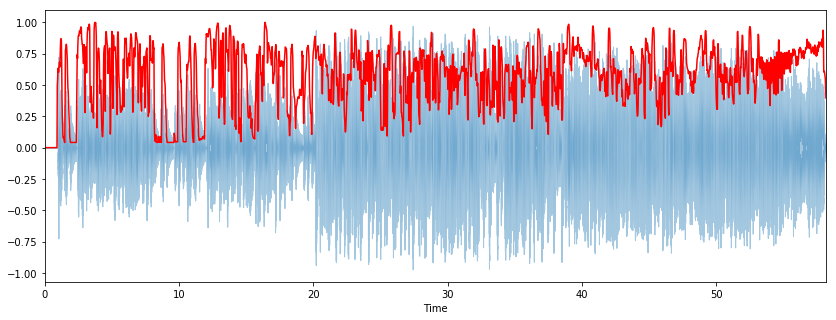

In [22]:
spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr)[0]
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

## Zero-crossing rate 

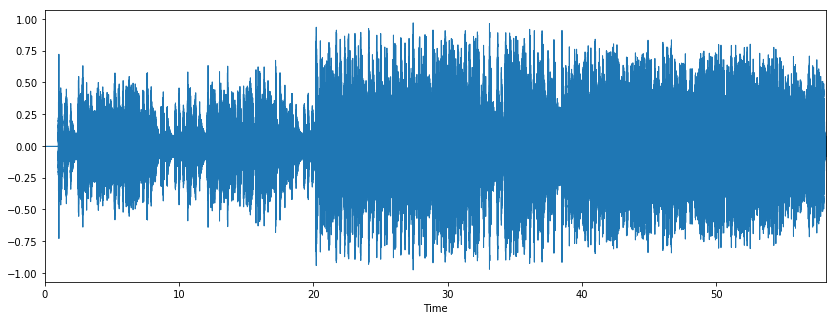

In [35]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

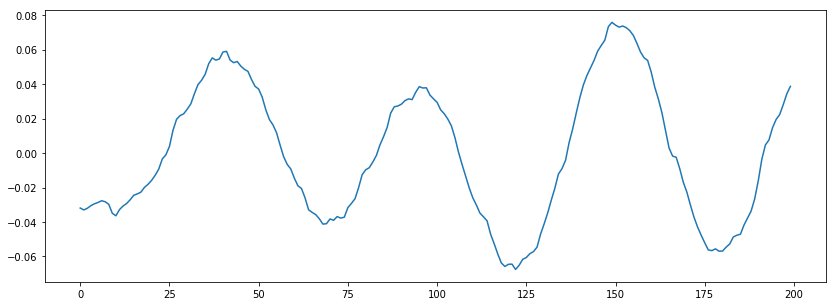

In [60]:
n0 = 40100
n1 = 40300
plt.figure(figsize=(14, 5))
plt.plot(y[n0:n1])

In [61]:
zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
zero_crossings.shape


(200,)

In [62]:
print(sum(zero_crossings))


7


(1, 2506)


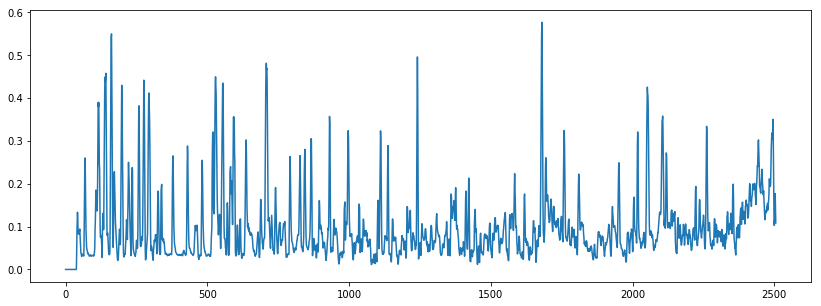

In [63]:
zcrs = librosa.feature.zero_crossing_rate(y)
print(zcrs.shape)
plt.figure(figsize=(14, 5))
plt.plot(zcrs[0])

In [ ]:
Ω